In [72]:
!pip install dill

In [73]:
import dill
import pickle

In [74]:
with open('f5.pkl','rb') as fp:
    data = pickle.load(fp)
f5 = dill.loads(data)

with open('grad_f5.pkl','rb') as fp:
    data = pickle.load(fp)
grad_f5 = dill.loads(data)

with open('hess_f5.pkl','rb') as fp:
    data = pickle.load(fp)
hess_f5 = dill.loads(data)

In [75]:
x_0 = [0,10]


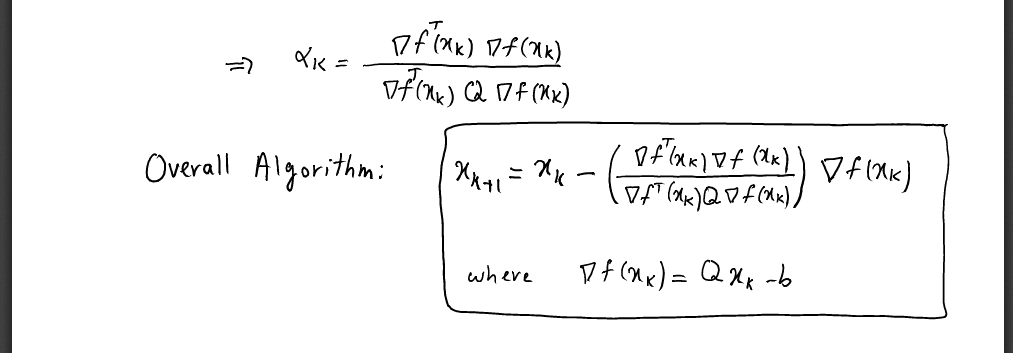

In [93]:
#subroutine for exact line search
import numpy as np
def l2_norm(x1,x2):
    #x1 = np.matrix(x1).T
    #x2 = np.matrix(x2).T
    #print('x1 = ',x1)
    #print('x1 shape = ',x1.shape)
    #print('x2 = ',x2)
    #print('x2 shape = ',x2.shape)
    res = np.sqrt(np.sum(np.power((x1-x2),2)))
    return res

def steepest_desc(x_0,f,g,h,eps):
    iters = 0
    x_k = np.matrix(x_0).T
    x_k1 = x_0
    grad_xk = np.matrix(g(x_k1)).T
    print('grad = ',grad_xk)
    print('grad_shape = ',grad_xk.shape)
    org = np.matrix([0,0]).T
    Q = np.array(h())
    print('Q = ',Q)
    print('Q_shape = ',Q.shape)
    
    while(l2_norm(grad_xk,org)>eps):
        num = np.dot(grad_xk.T,grad_xk)
        denum = np.dot(grad_xk.T,np.matmul(Q,grad_xk))
        print('iterations  = ',iters,'alpha_k = ',num/denum)
        #print(num/denum)
        #print(type(num/denum))
        alpha_k = float(num/denum)
        #print(alpha_k)
        x_k = x_k - alpha_k*grad_xk
        x_k1 = []
        x_k1.append(float(x_k[0]))
        x_k1.append(float(x_k[1]))
        print('iterations = ',iters, 'x_k =',x_k)
        grad_xk = np.matrix(g(x_k1)).T
        iters = iters + 1
        print("iteration number = ",iters)
    return x_k,iters
    

In [95]:
#part a
x_0 = [0,10]
tol = 1e-6
x_opt,iterations = steepest_desc(x_0,f5,grad_f5,hess_f5,tol)
print('x_opt = ',x_opt)
print('function value at x_opt =',f5(x_opt))
print('number of iterations = ',iterations)

grad =  [[26]
 [14]]
grad_shape =  (2, 1)
Q =  [[10  4]
 [ 4  2]]
Q_shape =  (2, 2)
iterations  =  0 alpha_k =  [[0.08664547]]
iterations =  0 x_k = [[-2.25278219]
 [ 8.78696343]]
iteration number =  1
iterations  =  1 alpha_k =  [[2.18]]
iterations =  1 x_k = [[0.75554849]
 [3.20006359]]
iteration number =  2
iterations  =  2 alpha_k =  [[0.08664547]]
iterations =  2 x_k = [[0.20485248]
 [2.90353497]]
iteration number =  3
iterations  =  3 alpha_k =  [[2.18]]
iterations =  3 x_k = [[0.94024346]
 [1.53780887]]
iteration number =  4
iterations  =  4 alpha_k =  [[0.08664547]]
iterations =  4 x_k = [[0.80562499]
 [1.465322  ]]
iteration number =  5
iterations  =  5 alpha_k =  [[2.18]]
iterations =  5 x_k = [[0.98539242]
 [1.13146819]]
iteration number =  6
iterations  =  6 alpha_k =  [[0.08664547]]
iterations =  6 x_k = [[0.95248473]
 [1.11374867]]
iteration number =  7
iterations  =  7 alpha_k =  [[2.18]]
iterations =  7 x_k = [[0.99642916]
 [1.0321376 ]]
iteration number =  8
iterations

## Part b


In [88]:
def f5_b(x):
    A = np.matrix([[0.78,-0.02,-0.12,-0.14],[-0.02,0.86,-0.04,0.06],[-0.12,-0.04,0.72,-0.08],[-0.14,0.06,-0.08,0.74]])
    #print('A = ',A)
    b = np.matrix([0.76,0.08,1.12,0.68]).T
    #print('b = ',b)
    res = 0.5*np.dot(x.T,np.matmul(A,x))
    res = res - np.dot(b.T,x)
    print('f(x) = ',res )
    return float(res)

def grad_f5_b(x):
    A = np.matrix([[0.78,-0.02,-0.12,-0.14],[-0.02,0.86,-0.04,0.06],[-0.12,-0.04,0.72,-0.08],[-0.14,0.06,-0.08,0.74]])
    b = np.matrix([0.76,0.08,1.12,0.68]).T
    res = np.matmul(A,x) - b
    return res

def hess_f5_b():
    A = np.matrix([[0.78,-0.02,-0.12,-0.14],[-0.02,0.86,-0.04,0.06],[-0.12,-0.04,0.72,-0.08],[-0.14,0.06,-0.08,0.74]])
    return A

In [89]:
x_0b = np.matrix([1,0,0,1]).T
val = f5_b(x_0b)
print(val)
val = grad_f5_b(x_0b)
print('gradient = ',val )
val = hess_f5_b()
print('hessian = ',val)

f(x) =  [[-0.82]]
-0.82
gradient =  [[-0.12]
 [-0.04]
 [-1.32]
 [-0.08]]
hessian =  [[ 0.78 -0.02 -0.12 -0.14]
 [-0.02  0.86 -0.04  0.06]
 [-0.12 -0.04  0.72 -0.08]
 [-0.14  0.06 -0.08  0.74]]


In [90]:
def steepest_desc2(x_0,f,g,h,eps):
    iters = 0
    x_k = x_0
    #x_k1 = x_0
    grad_xk = g(x_k)
    print('grad = ',grad_xk)
    print('grad_shape = ',grad_xk.shape)
    org = np.matrix([0,0,0,0]).T
    Q = h()
    print('Q = ',Q)
    print('Q_shape = ',Q.shape)
    
    while(l2_norm(grad_xk,org)>eps):
        num = np.dot(grad_xk.T,grad_xk)
        denum = np.dot(grad_xk.T,np.matmul(Q,grad_xk))
        alpha_k = float(num/denum)
        x_k = x_k - alpha_k*grad_xk
        #x_k1 = []
        #x_k1.append(int(x_k[0]))
        #x_k1.append(int(x_k[1]))
        
        grad_xk = g(x_k)
        iters = iters + 1
        print("iteration number = ",iters)
    return x_k,iters
    

In [91]:
x_0b = np.matrix([0,0,0,0]).T
tol = 1e-6

In [92]:
x_opt_b,iterations_b = steepest_desc2(x_0b,f5_b,grad_f5_b,hess_f5_b,tol)
print('optimal x for second part = ', x_opt_b)
print('function value = ',f5_b(x_opt_b))
print('iterations = ', iterations_b)
      

grad =  [[-0.76]
 [-0.08]
 [-1.12]
 [-0.68]]
grad_shape =  (4, 1)
Q =  [[ 0.78 -0.02 -0.12 -0.14]
 [-0.02  0.86 -0.04  0.06]
 [-0.12 -0.04  0.72 -0.08]
 [-0.14  0.06 -0.08  0.74]]
Q_shape =  (4, 4)
iteration number =  1
iteration number =  2
iteration number =  3
iteration number =  4
iteration number =  5
iteration number =  6
iteration number =  7
iteration number =  8
iteration number =  9
iteration number =  10
optimal x for second part =  [[1.53496492]
 [0.12200972]
 [1.97515601]
 [1.4129552 ]]
f(x) =  [[-2.17465955]]
function value =  -2.174659550975259
iterations =  10
